In [1]:
import numpy as np
from numpy import linalg as LA
from sklearn.cluster import KMeans
import math
from numpy import dot as dot
import networkx as nx
import matplotlib.pylab as plt
import scipy.sparse as sps
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


data = np.loadtxt('cal500',delimiter = ',')
data.shape


(502, 242)

In [4]:
with open('label2.txt') as f:
    label = f.readlines()

In [4]:
A = data[:,-len(label):]
A.shape
np.rint(A)

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.]])

In [5]:
B = np.dot(A.transpose(),A)
B.shape

(174, 174)

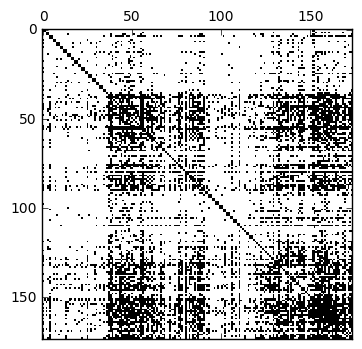

In [6]:
C = (B==0)
ExclMat = C.astype(int) 
for i in range(0,174): 
    for j in range(0,174):
        if i==j:
            ExclMat[i,j]=1
            
plt.spy(ExclMat) 
plt.show()


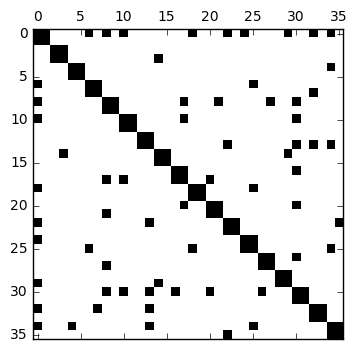

(36, 36)

In [7]:
Emotion = ExclMat[0:36,0:36] #emotion variable 
plt.spy(Emotion)
plt.show()
Emotion.shape

In [8]:
Emotion_data = A[:,0:36]
T =np.zeros((Emotion_data.shape[0],1),dtype=np.int);
for i in range(0,Emotion_data.shape[1]):
    if i%2==1: 
        temp = A[:,i]+A[:,i-1]
        T = np.c_[T,temp]
T=np.delete(T,0,1)
print T.shape
T
X = np.sum(T,0)
X

(502, 18)


array([ 367.,  253.,  318.,  302.,  261.,  287.,  233.,  264.,  270.,
        270.,  279.,  306.,  251.,  238.,  225.,  279.,  310.,  294.])

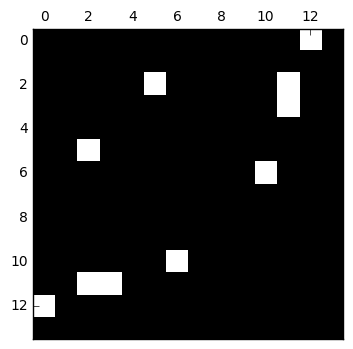

In [9]:
Genre = ExclMat[151:165,151:165] # genre variable 
plt.spy(Genre)
plt.show()

In [10]:
Genre_data =A[:,151:165]
Y = np.sum(Genre_data, axis=1)
print Y #test if those variable follow multinomial distribution 

[ 0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.
  1.  1.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  1.  1.  0.
  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.
  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  1.  0.  1.  0.  0.
  1.  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  1.  1.  0.  1.  0.  0.  0.
  1.  1.  0.  1.  1.  0.  1.  0.  0.  1.  1.  0.  0.  1.  1.  1.  1.  1.
  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  1.  0.  1.  1.  0.  1.
  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  1.  1.  1.  0.  0.  0.  0.  1.
  0.  0.  2.  1.  0.  1.  0.  1.  0.  1.  0.  0.  1.  1.  1.  1.  1.  1.
  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  1.  0.  1.
  0.  0.  0.  1.  0.  1.  1.  0.  2.  1.  1.  0.  0.  0.  0.  1.  1.  0.
  0.  0.  0.  1.  0.  0.  0.  1.  0.  1.  0.  1.  0.  0.  1.  1.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  1.  0.  1.  1.  0.  1.  0.
  0.  0.  1.  0.  0.  1.  0.  1.  1.  0.  0.  0.  0

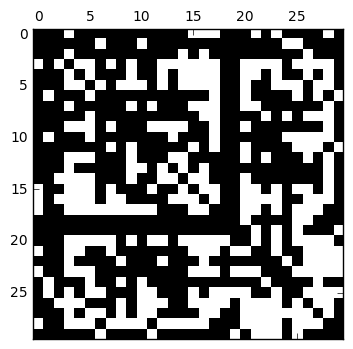

In [11]:
Genre1 = ExclMat[37:67,37:67]
plt.spy(Genre1)
plt.show()

In [26]:
norm = np.sum(ExclMat,axis = 0)
a =  np.divide(np.ones(len(ExclMat)), norm)
b = np.sqrt(a)
D_inv = np.diag(b)
Lap = np.eye(len(ExclMat)) - np.dot(np.dot(D_inv,ExclMat),D_inv)

In [29]:
w,v = LA.eigh(Lap)

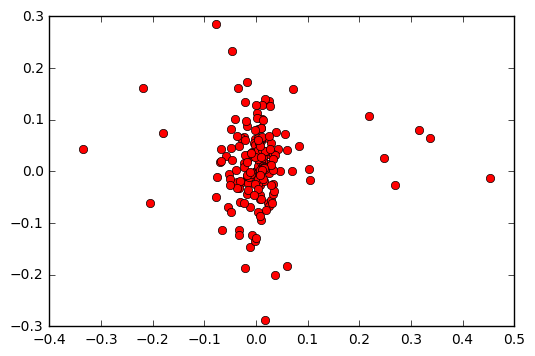

In [28]:
x = v[0:2]

plt.plot(v[1],v[2],'ro')
plt.show()

In [47]:
X = np.transpose([v[1],v[2]])
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
classes = kmeans.labels_
print classes

[2 2 2 2 0 1 2 0 1 2 2 2 1 0 1 1 2 0 2 2 0 2 2 2 2 0 2 1 2 2 2 1 2 2 1 1 1
 1 2 2 2 1 2 1 1 2 2 0 1 1 2 1 2 2 2 1 1 2 2 2 1 2 0 2 2 1 1 1 0 0 2 2 2 2
 1 2 1 2 2 1 2 1 2 1 2 1 2 1 2 1 2 2 2 0 0 2 2 2 1 1 1 1 2 2 2 2 2 2 2 1 2
 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 2 1 1 2 2 2 1 2 2 2 1 1 2 2 2 1
 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 1 0 2 1 0 1]


In [63]:
ind0 = np.where(classes==0)[0]
print ind0 
print len(ind0)
ind1 = np.where(classes ==1)[0]
print ind1
print len(ind1)
ind2 = np.where(classes ==2)[0]
print ind2
print len(ind2)

[  4   7  13  17  20  25  47  62  68  69  93  94 169 172]
14
[  5   8  12  14  15  27  31  34  35  36  37  41  43  44  48  49  51  55
  56  60  65  66  67  74  76  79  81  83  85  87  89  98  99 100 101 109
 113 114 115 127 129 130 131 133 134 138 142 143 147 151 154 165 168 171
 173]
55
[  0   1   2   3   6   9  10  11  16  18  19  21  22  23  24  26  28  29
  30  32  33  38  39  40  42  45  46  50  52  53  54  57  58  59  61  63
  64  70  71  72  73  75  77  78  80  82  84  86  88  90  91  92  95  96
  97 102 103 104 105 106 107 108 110 111 112 116 117 118 119 120 121 122
 123 124 125 126 128 132 135 136 137 139 140 141 144 145 146 148 149 150
 152 153 155 156 157 158 159 160 161 162 163 164 166 167 170]
105


[[1 0 0 0 0 0 1 1 0 0 0 0 1 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 0 1]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 1 1]
 [1 0 1 0 0 0 1 0 1 0 0 0 1 1]
 [1 0 0 0 0 1 0 1 1 0 0 0 1 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0]
 [1 1 0 0 0 1 1 1 1 0 1 0 1 0]
 [1 0 1 0 0 1 1 0 1 0 0 0 0 1]]
(14, 14)


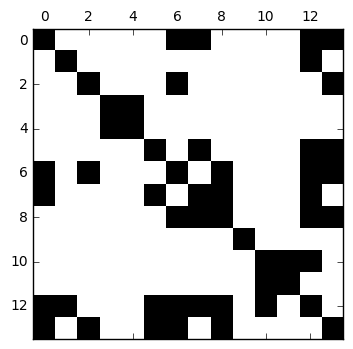

In [65]:
y = ExclMat[np.ix_(ind0,ind0)]
print y
print y.shape
plt.spy(y)
plt.show()

[[1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 1]
 [0 0 0 ..., 0 1 0]
 [0 0 0 ..., 1 0 1]]
(55, 55)


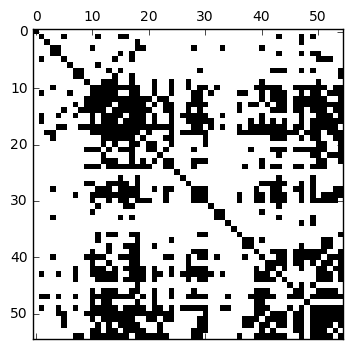

In [67]:
y = ExclMat[np.ix_(ind1,ind1)]
print y
print y.shape
plt.spy(y)
plt.show()

[[1 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 1]]
(105, 105)


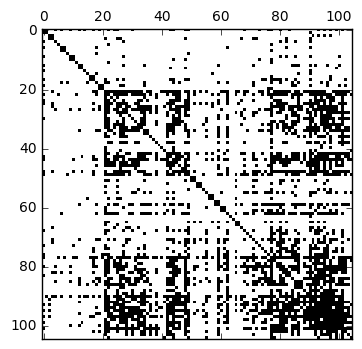

In [66]:
y = ExclMat[np.ix_(ind2,ind2)]
print y
print y.shape
plt.spy(y)
plt.show()

In [68]:
G = nx.from_numpy_matrix(ExclMat)
X = nx.find_cliques(G)
Y = list(X) 


In [69]:
max_clique = 0 
max_index =0
for y in Y: 
    if y > max_clique:
        max_clique = y 
        max_index =y.index
print max_clique; 


[173, 166, 39, 151, 172, 155, 146, 137, 162, 164, 165, 47]


[[   0.  367.    0. ...,    0.   58.   54.]
 [ 367.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 ..., 
 [   0.    0.    0. ...,    0.    0.    0.]
 [  58.    0.    0. ...,    0.    0.   16.]
 [  54.    0.    0. ...,    0.   16.    0.]]


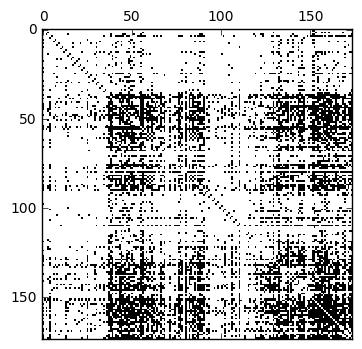

109 110 453.0
"SongRecorded01"
"NOTSongRecorded01"



In [70]:
acc = np.zeros(ExclMat.shape); 
for i in range(0,ExclMat.shape[0]):
    for j in range(0,ExclMat.shape[1]):
        if ExclMat[i,j] ==1 and i!=j:
            temp = A[:,i] + A[:,j]
            acc[i,j] = sum(temp) 
print acc
plt.spy(acc)
plt.show()
i,j = np.unravel_index(acc.argmax(), acc.shape)
acc[i,j]
print i,j, acc[i,j]
print label[i],label[j]

In [71]:
T =acc 

for k in range(100):
    i,j = np.unravel_index(T.argmax(), T.shape)
    print i,j, T[i,j]
    print label[i],label[j]
    T[i,j]=0
    T[j,i]=0;


109 110 453.0
"SongRecorded01"
"NOTSongRecorded01"

0 1 367.0
"AngryAgressive01"
"NOTEmotionAngryAgressive01"

48 112 333.0
"GenreGospel01"
"SongTextureElectric01"

1 151 329.0
"NOTEmotionAngryAgressive01"
"GenreBestMetalHardRock01"

1 152 328.0
"NOTEmotionAngryAgressive01"
"GenreBestPunk01"

99 100 324.0
"SongHighEnergy01"
"NOTSongHighEnergy01"

4 5 318.0
"EmotionBizarreWeird01"
"NOTEmotionBizarreWeird01"

72 157 315.0
"InstrumentDrumSet01"
"GenreBestElectronica01"

116 117 314.0
"SongVeryDanceable01"
"NOTSongVeryDanceable01"

32 33 310.0
"EmotionTenderSoft01"
"NOTEmotionTenderSoft01"

5 146 306.0
"NOTEmotionBizarreWeird01"
"VocalsSpoken01"

22 23 306.0
"EmotionLovingRomantic01"
"NOTEmotionLovingRomantic01"

6 7 302.0
"EmotionCalmingSoothing01"
"NOTEmotionCalmingSoothing01"

105 106 300.0
"SongQuality01"
"NOTSongQuality01"

8 21 296.0
"EmotionCarefreeLighthearted01"
"NOTEmotionLightPlayful01"

22 35 295.0
"EmotionLovingRomantic01"
"NOTEmotionTouchingLoving01"

34 35 294.0
"EmotionTouc

In [22]:
dist = np.dot(A.transpose(),A)
dist.shape

(174, 174)

In [23]:
print dist

[[  48.    0.   28. ...,    1.    0.    0.]
 [   0.  319.   70. ...,   12.    7.    5.]
 [  28.   70.  154. ...,    4.    3.    4.]
 ..., 
 [   1.   12.    4. ...,   14.    2.    1.]
 [   0.    7.    3. ...,    2.   10.    0.]
 [   0.    5.    4. ...,    1.    0.    6.]]


In [24]:
for i in range(dist.shape[0]):
    dist[i,i]=0 
print dist

[[  0.   0.  28. ...,   1.   0.   0.]
 [  0.   0.  70. ...,  12.   7.   5.]
 [ 28.  70.   0. ...,   4.   3.   4.]
 ..., 
 [  1.  12.   4. ...,   0.   2.   1.]
 [  0.   7.   3. ...,   2.   0.   0.]
 [  0.   5.   4. ...,   1.   0.   0.]]


In [72]:
norm = np.sum(dist,axis = 0)
a =  np.divide(np.ones(len(dist)), norm)
b = np.sqrt(a)
D_inv = np.diag(b)
Lap = np.dot(np.dot(D_inv,dist),D_inv) 
print Lap

[[ 0.          0.          0.0112989  ...,  0.00131938  0.          0.        ]
 [ 0.          0.          0.01212994 ...,  0.00679883  0.0046564
   0.00440754]
 [ 0.0112989   0.01212994  0.         ...,  0.00308161  0.00271355
   0.00479458]
 ..., 
 [ 0.00131938  0.00679883  0.00308161 ...,  0.          0.00591478
   0.00391907]
 [ 0.          0.0046564   0.00271355 ...,  0.00591478  0.          0.        ]
 [ 0.          0.00440754  0.00479458 ...,  0.00391907  0.          0.        ]]


In [73]:
w,v = LA.eigh(Lap)

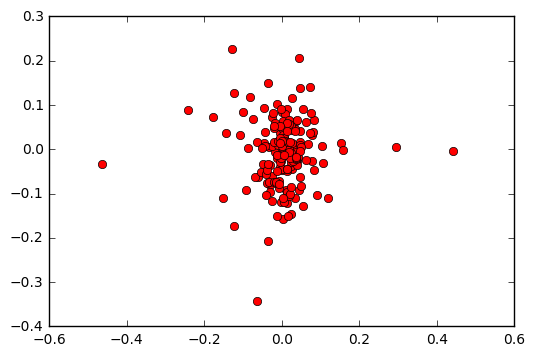

In [80]:
x = v[0:2]

plt.plot(v[1],v[2],'ro')
plt.show()

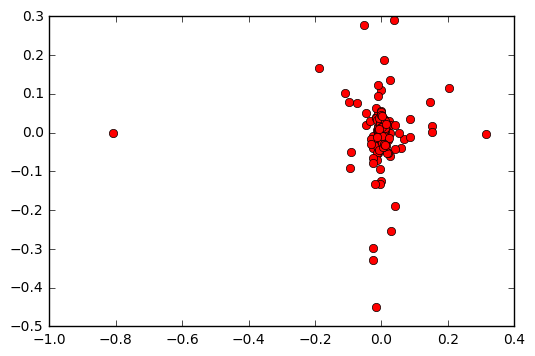

In [82]:
Lap = dist 
w,v = LA.eigh(Lap)

x = v[0:2]
plt.plot(v[1],v[2],'ro')
plt.show()

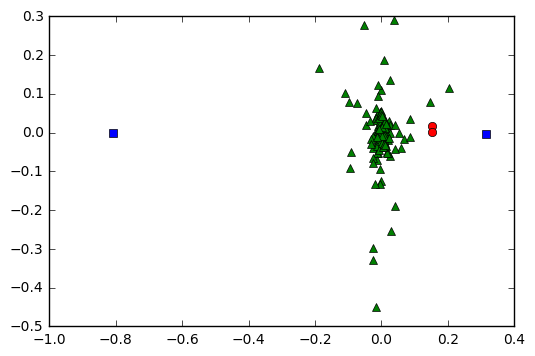

In [87]:
plt.plot(v[1,0:2], v[2,0:2], 'ro', v[1,2:4], v[2,2:4], 'bs', v[1,4:], v[2,4:], 'g^')
plt.show()

0.0